<a href="https://colab.research.google.com/github/JOSHITHA6/GDP_PRODUCTIVITY_INFO/blob/main/GDP_PRODUCTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [5]:

# Raw GitHub URL for your dataset
url = 'https://raw.githubusercontent.com/JOSHITHA6/GDP_PRODUCTIVITY_INFO/main/GDP_SECTOR_INCOME/GDP_Sector_Income_2019_2023_30Cities.csv'

# Load the dataset
data = pd.read_csv(url)

# Preview the dataset
#print(data.head())


In [8]:
#STEP-1: Check for missing values

print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
City                  0
Year                  0
GDP (in billion $)    0
Agriculture (%)       0
Industry (%)          0
Services (%)          0
Technology (%)        0
dtype: int64


In [9]:
#Step-2: Handle Missing values(Median Imputation)
numeric_cols=data.select_dtypes(include='number').columns

In [11]:
#Replace missing values with the median of each column
data[numeric_cols]=data[numeric_cols].fillna(data[numeric_cols].median())

In [13]:
# Verify if missing values are handled
print("\nMissing values after median imputation:")
print(data.isnull().sum())


Missing values after median imputation:
City                  0
Year                  0
GDP (in billion $)    0
Agriculture (%)       0
Industry (%)          0
Services (%)          0
Technology (%)        0
dtype: int64


In [15]:
#Step-3
print("\nColumn data types before adjustment:")
print(data.dtypes)


Column data types before adjustment:
City                   object
Year                    int64
GDP (in billion $)    float64
Agriculture (%)       float64
Industry (%)          float64
Services (%)          float64
Technology (%)        float64
dtype: object


In [17]:
#Step-4: Check for Duplicates
print("\nNumber of duplicate rows:",data.duplicated().sum())


Number of duplicate rows: 0


In [20]:
#Step-5

assert(data['GDP (in billion $)']>=0).all(), "Negative GDP values found!"


In [31]:

data['Sector Sum'] = data[['Agriculture (%)', 'Industry (%)', 'Services (%)', 'Technology (%)']].sum(axis=1)




In [32]:
print(data[['Sector Sum']].head())

   Sector Sum
0       109.3
1       118.3
2       104.6
3       119.4
4       104.8


In [33]:
# Drop validation column
data.drop(columns='Sector Sum', inplace=True)

In [34]:
# Step 6: Rename Columns for Consistency

data.rename(columns={
    'GDP (in billion $)': 'GDP_Billion_USD',
    'Agriculture (%)': 'Agriculture_Percent',
    'Industry (%)': 'Industry_Percent',
    'Services (%)': 'Services_Percent',
    'Technology (%)': 'Technology_Percent'
}, inplace=True)

In [35]:
print("\nUpdated column names:")
print(data.columns)


Updated column names:
Index(['City', 'Year', 'GDP_Billion_USD', 'Agriculture_Percent',
       'Industry_Percent', 'Services_Percent', 'Technology_Percent'],
      dtype='object')


In [43]:
# Create the cleaned dataset by performing your cleaning and preprocessing
cleaned_data = data.copy()

In [45]:
# Combine original and cleaned datasets for comparison
# This will add the cleaned columns to the original dataset for comparison
comparison = pd.concat([data, cleaned_data], axis=1, keys=["Original", "Cleaned"])

# Show the combined comparison (only first few rows to prevent large output)
comparison.head()

Original                                                             \
        City  Year GDP_Billion_USD Agriculture_Percent Industry_Percent   
0  Ahmedabad  2019           187.2                15.7             32.1   
1  Ahmedabad  2020           211.5                11.6             37.8   
2  Ahmedabad  2021           247.9                12.9             31.4   
3  Ahmedabad  2022            71.8                 5.3             36.7   
4  Ahmedabad  2023           294.7                17.0             29.2   

                                         Cleaned                        \
  Services_Percent Technology_Percent       City  Year GDP_Billion_USD   
0             40.9               20.6  Ahmedabad  2019           187.2   
1             49.3               19.6  Ahmedabad  2020           211.5   
2             48.5               11.8  Ahmedabad  2021           247.9   
3             45.6               31.8  Ahmedabad  2022            71.8   
4             45.6               13.0  Ahmedabad  2023           294.7   

                                                                            
  Agriculture_Percent Industry_Percent Services_Percent Technology_Percent  
0                15.7             32.1             40.9               20.6  
1                11.6             37.8             49.3               19.6  
2                12.9             31.4             48.5               11.8  
3                 5.3             36.7             45.6               31.8  
4                17.0             29.2             45.6               13.0

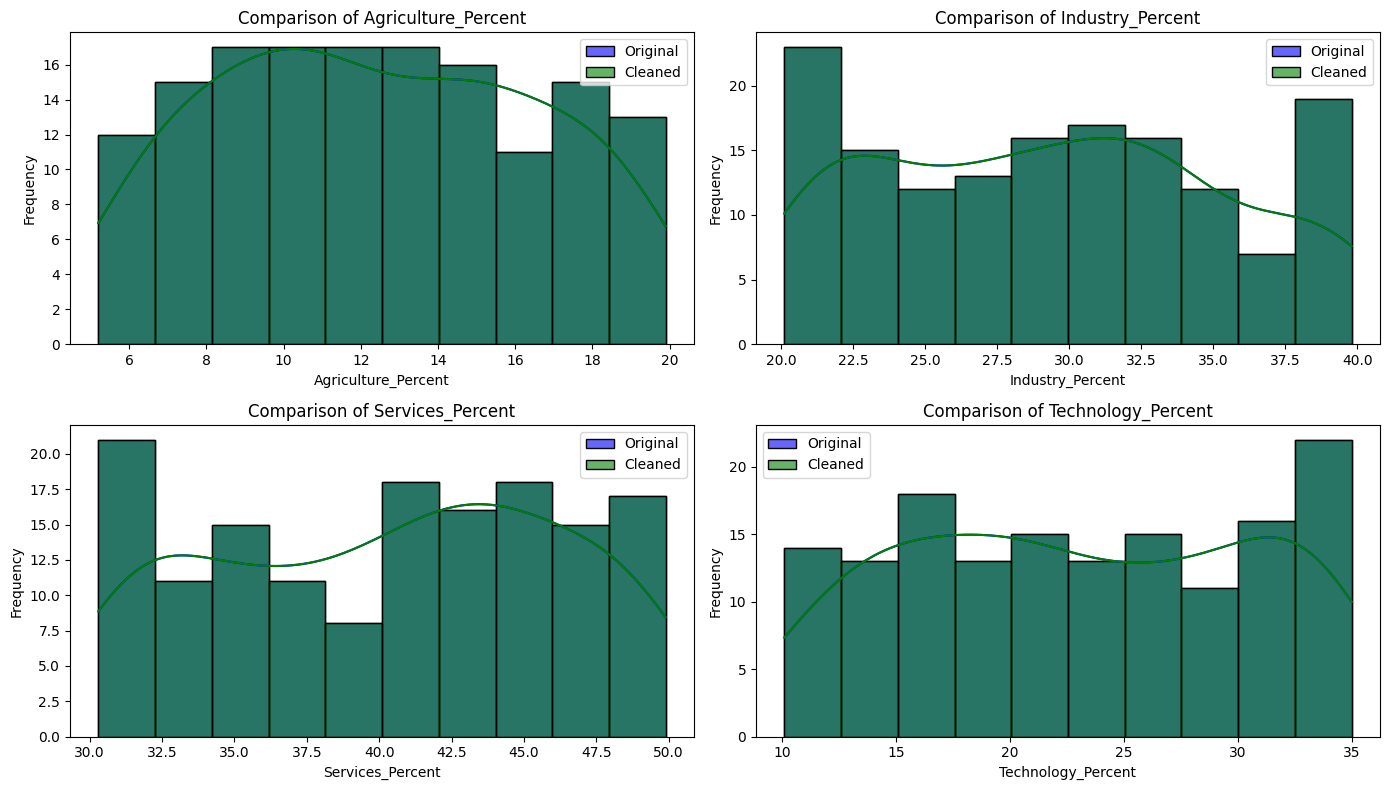

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to compare (updated with new names)
columns_to_compare = ['Agriculture_Percent', 'Industry_Percent', 'Services_Percent', 'Technology_Percent']

# Create a plot for each of the specified columns
plt.figure(figsize=(14, 8))

for i, column in enumerate(columns_to_compare, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns
    sns.histplot(data[column], color='blue', label='Original', kde=True, bins=10, alpha=0.6)
    sns.histplot(cleaned_data[column], color='green', label='Cleaned', kde=True, bins=10, alpha=0.6)

    # Add titles and labels
    plt.title(f"Comparison of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()  # Adjust layout for better readability
plt.show()


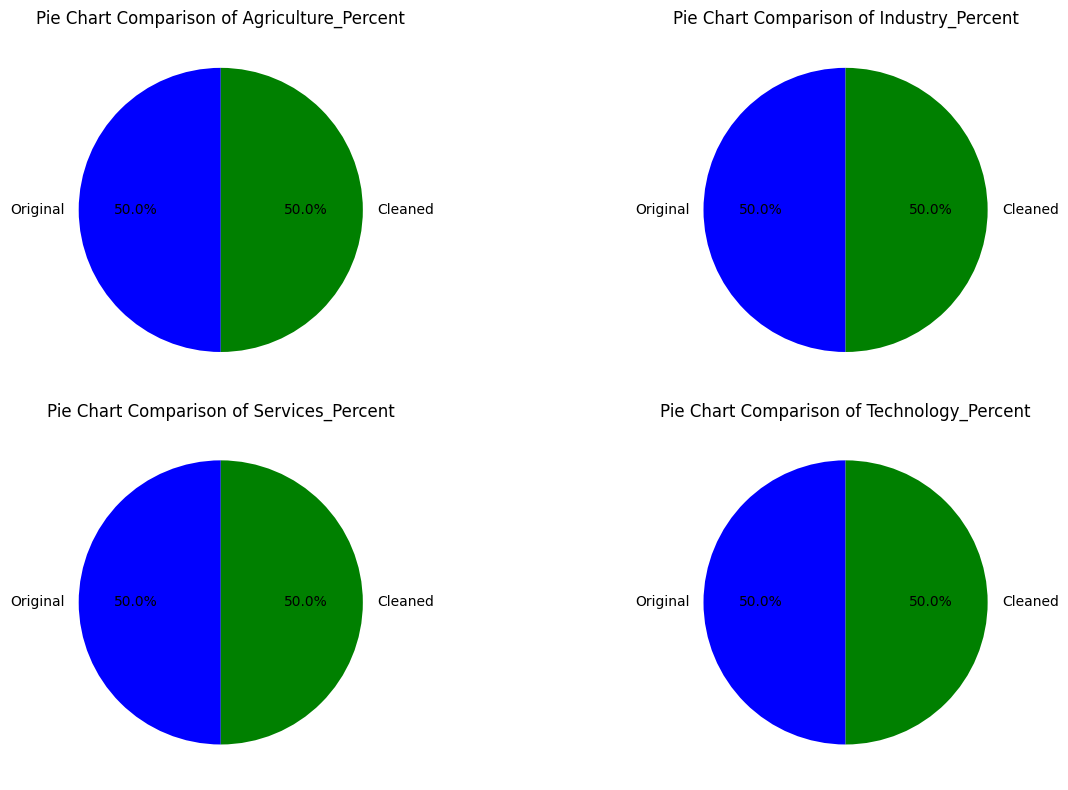

In [54]:
import matplotlib.pyplot as plt

# List of columns to compare (updated with new names)
columns_to_compare = ['Agriculture_Percent', 'Industry_Percent', 'Services_Percent', 'Technology_Percent']

# Create a plot for each of the specified columns
plt.figure(figsize=(14, 8))

for i, column in enumerate(columns_to_compare, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns

    # Prepare the data for pie charts (sum of values for each column)
    original_sum = data[column].sum()
    cleaned_sum = cleaned_data[column].sum()

    # Pie chart labels and values
    labels = ['Original', 'Cleaned']
    values = [original_sum, cleaned_sum]

    # Create pie chart
    plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['blue', 'green'], startangle=90)
    plt.title(f"Pie Chart Comparison of {column}")

plt.tight_layout()  # Adjust layout for better readability
plt.show()


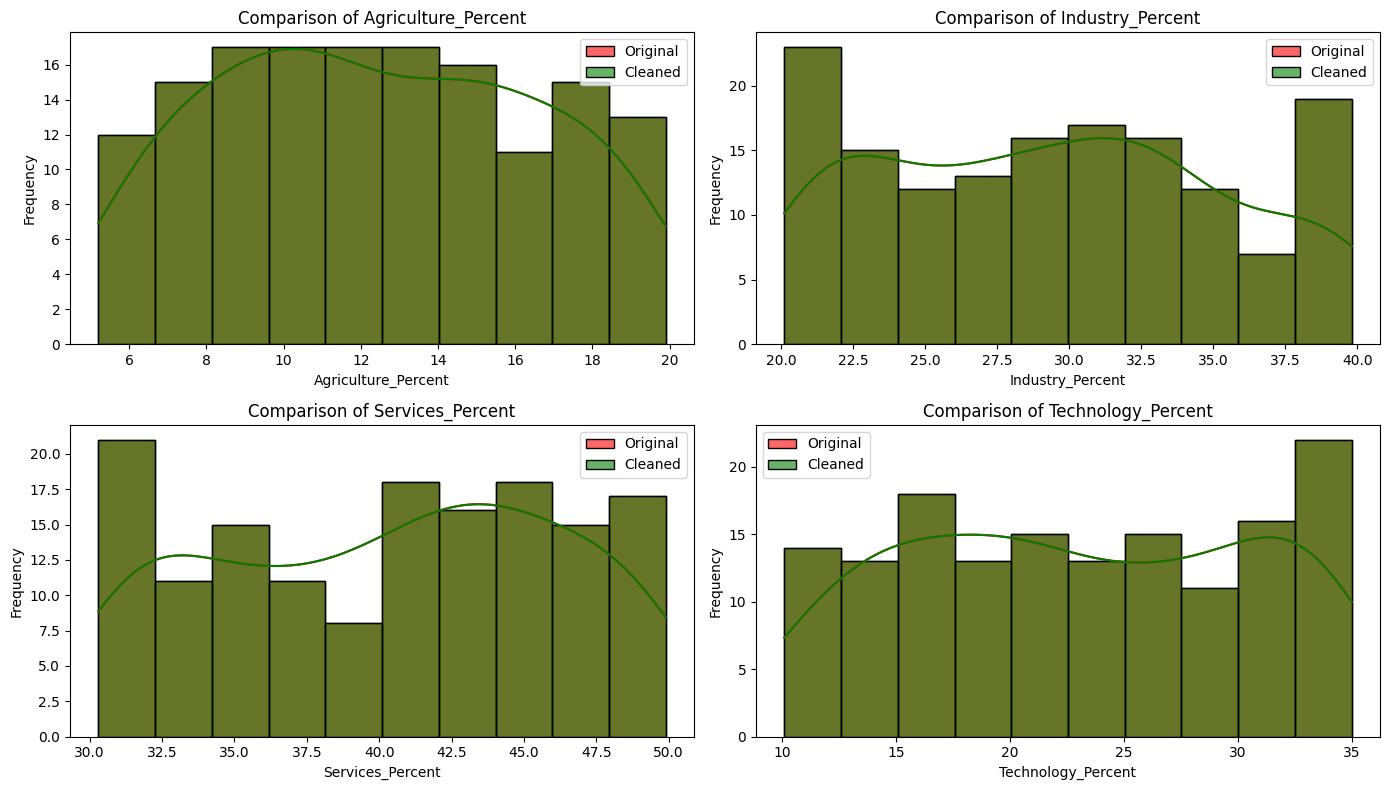

In [56]:
# Compare histograms or boxplots before and after cleaning
columns_to_compare = ['Agriculture_Percent', 'Industry_Percent', 'Services_Percent', 'Technology_Percent']

plt.figure(figsize=(14, 8))

for i, column in enumerate(columns_to_compare, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[column], color='red', label='Original', kde=True, bins=10, alpha=0.6)
    sns.histplot(cleaned_data[column], color='green', label='Cleaned', kde=True, bins=10, alpha=0.6)
    plt.title(f"Comparison of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.show()


In [57]:
# Compare summary statistics
print("Summary Statistics - Original Data:")
print(data[columns_to_compare].describe())
print("\nSummary Statistics - Cleaned Data:")
print(cleaned_data[columns_to_compare].describe())


Summary Statistics - Original Data:
       Agriculture_Percent  Industry_Percent  Services_Percent  \
count           150.000000        150.000000        150.000000   
mean             12.416000         29.382667         40.324000   
std               4.137796          5.944415          5.940202   
min               5.200000         20.100000         30.300000   
25%               9.200000         24.075000         35.225000   
50%              11.950000         29.200000         40.800000   
75%              15.500000         33.825000         45.000000   
max              19.900000         39.800000         49.900000   

       Technology_Percent  
count          150.000000  
mean            22.996667  
std              7.591751  
min             10.100000  
25%             16.125000  
50%             22.650000  
75%             30.150000  
max             35.000000  

Summary Statistics - Cleaned Data:
       Agriculture_Percent  Industry_Percent  Services_Percent  \
count          


**OBSERVATIONS AND KEY-TAKE AWAYS**


The dataset which I have downloaded from kaggle is such a fine and high quality data beacause few datsets obtained from govt. websites will be of highly fine and of high quality. I've found this difference by comparing original data and cleaned data. In pie charts and summary statistics, no change is seen--> indicating that the dataset which I've got is very clean dataset and actually doesnt need any pre-processing/cleaning.





Also, there are no missing values/nan values found indicating that the dataset is already clean and pre-processed


